In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fh = open('WhatsApp_Chats.txt', 'r', encoding='UTF-8')
contents = fh.readlines()
fh.close()

message = []
sender  = []
date = []
time = []
msg = ''
for x in contents:
    x = x.strip()
    if ((' - Subham Bagchi: ' in x) or (' - Debmalya: ' in x)) and (x[0] != '[') :
        line = x.split(': ')
        message.append(line[1])
        line = line[0].split(' - ')
        sender.append(line[1])
        line = line[0].split(', ')
        date.append(line[0])
        time.append(line[1])

    else :
        msg = message[-1]
        msg = msg + x
        message[-1] = msg


In [3]:
dic_df = {'date':date, 'time':time, 'sender':sender, 'message':message}

df = pd.DataFrame(dic_df)
df.head()

,date,time,sender,message
0,03/02/20,9:42 pm,Debmalya,<Media omitted>
1,03/02/20,9:42 pm,Debmalya,Saradin ghumolm. Over 12 over all during dayti...
2,03/02/20,9:42 pm,Subham Bagchi,😂😂😂😂😂
3,03/02/20,9:42 pm,Subham Bagchi,😂😂😂😂😂
4,03/02/20,9:42 pm,Debmalya,Sleep


In [4]:
df['message_length'] = df.apply(lambda x: len(x.message), axis=1)
df['date_time'] = pd.to_datetime(df.date+' '+df.time)
df.drop(['date','time'], axis=1, inplace=True)

In [5]:
week_day = {0 : 'Monday',
            1 : 'Tuesday',
            2 : 'Wednesday',
            3 : 'Thursday',
            4 : 'Friday',
            5 : 'Saturday',
            6 : 'Sunday' }

df['day_of_week'] = df.apply(lambda x: week_day[x['date_time'].weekday()], axis=1)
df['type'] = df.apply(lambda x: 'media' if x.message=='<Media omitted>' else 'text', axis=1)

df.head()

,sender,message,message_length,date_time,day_of_week,type
0,Debmalya,<Media omitted>,15,2020-03-02 21:42:00,Monday,media
1,Debmalya,Saradin ghumolm. Over 12 over all during dayti...,71,2020-03-02 21:42:00,Monday,text
2,Subham Bagchi,😂😂😂😂😂,5,2020-03-02 21:42:00,Monday,text
3,Subham Bagchi,😂😂😂😂😂,5,2020-03-02 21:42:00,Monday,text
4,Debmalya,Sleep,5,2020-03-02 21:42:00,Monday,text


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 6 columns):
sender            39999 non-null object
message           39999 non-null object
message_length    39999 non-null int64
date_time         39999 non-null datetime64[ns]
day_of_week       39999 non-null object
type              39999 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.8+ MB


In [7]:
df.groupby('day_of_week').message.count().sort_values()

day_of_week
Tuesday      4436
Sunday       5143
Thursday     5477
Monday       5918
Friday       6047
Wednesday    6109
Saturday     6869
Name: message, dtype: int64

In [8]:
df.groupby('sender').message.count()

sender
Debmalya         19257
Subham Bagchi    20742
Name: message, dtype: int64

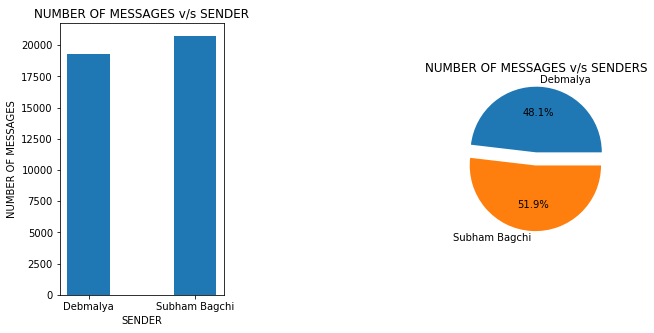

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)

plt.title('NUMBER OF MESSAGES v/s SENDER')
label = df.groupby('sender').message.count().index
plt.bar(x=label, height=df.groupby('sender').message.count(), width=0.4)
plt.xlabel('SENDER')
plt.ylabel('NUMBER OF MESSAGES')

plt.subplot(1,3,3)

explode = [0.1,0.1]
plt.title('NUMBER OF MESSAGES v/s SENDERS')
plt.pie(df.groupby('sender').message.count(), explode=explode, labels=label, autopct='%1.1f%%')

plt.show()

In [10]:
media_df = df.query('type=="media"')
text_df  = df.query('type=="text"')

In [11]:
media_df.groupby('sender').message.count()

sender
Debmalya         2319
Subham Bagchi    2258
Name: message, dtype: int64

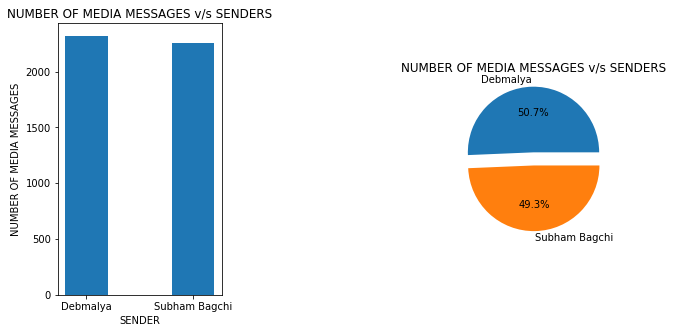

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)

label = media_df.groupby('sender').message.count().index
plt.title('NUMBER OF MEDIA MESSAGES v/s SENDERS')
plt.bar(x=label, height=media_df.groupby('sender').message.count(), width=0.4)
plt.xlabel('SENDER')
plt.ylabel('NUMBER OF MEDIA MESSAGES')

plt.subplot(1,3,3)

label = media_df.groupby('sender').message.count().index
explode = [0.1,0.1]
plt.title('NUMBER OF MEDIA MESSAGES v/s SENDERS')
plt.pie(media_df.groupby('sender').message.count(), explode=explode, labels=label, autopct='%1.1f%%')

plt.show()

In [13]:
text_df.groupby('sender').message.count()

sender
Debmalya         16938
Subham Bagchi    18484
Name: message, dtype: int64

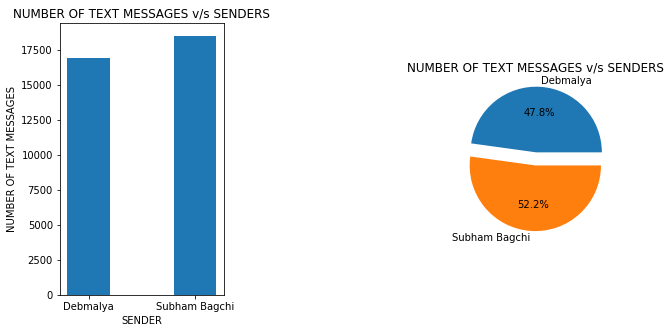

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)

label = text_df.groupby('sender').message.count().index
plt.title('NUMBER OF TEXT MESSAGES v/s SENDERS')
plt.bar(x=label, height=text_df.groupby('sender').message.count(), width=0.4)
plt.xlabel('SENDER')
plt.ylabel('NUMBER OF TEXT MESSAGES')

plt.subplot(1,3,3)

explode = [0.1,0.1]
plt.title('NUMBER OF TEXT MESSAGES v/s SENDERS')
plt.pie(text_df.groupby('sender').message.count(), explode=explode, labels=label, autopct='%1.1f%%')

plt.show()

In [15]:
text_df.groupby('sender').message_length.sum()

sender
Debmalya         562318
Subham Bagchi    354009
Name: message_length, dtype: int64

In [16]:
text_df.groupby('sender').message_length.mean()

sender
Debmalya         33.198607
Subham Bagchi    19.152186
Name: message_length, dtype: float64

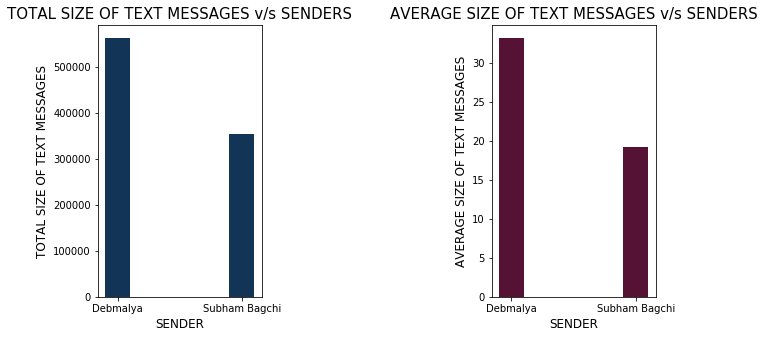

In [17]:
label = text_df.groupby('sender').message_length.mean().index

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('TOTAL SIZE OF TEXT MESSAGES v/s SENDERS', fontdict={'size':15})
plt.bar(x=label, height=text_df.groupby('sender').message_length.sum(), width=0.2, color='#123456')
plt.xlabel('SENDER', fontdict={'size':12})
plt.ylabel('TOTAL SIZE OF TEXT MESSAGES', fontdict={'size':12})

plt.subplot(1,3,3)
plt.title('AVERAGE SIZE OF TEXT MESSAGES v/s SENDERS', fontdict={'size':15})
plt.bar(x=label, height=text_df.groupby('sender').message_length.mean(), width=0.2, color='#551234')
plt.xlabel('SENDER', fontdict={'size':12})
plt.ylabel('AVERAGE SIZE OF TEXT MESSAGES', fontdict={'size':12})

plt.show()

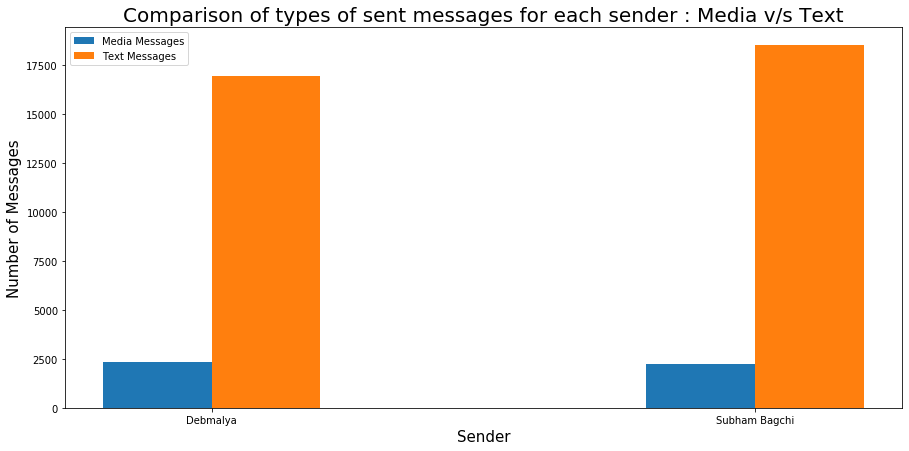

In [18]:
width = 0.50
x = [5,10]
labels = ['Debmalya', 'Subham Bagchi']
x_media = [5-width,10-width]
x_text  = [5+width,10+width]

plt.figure(figsize=(15,7))
plt.bar(x=x_media, height=media_df.groupby('sender').message.count(), width=1, label='Media Messages')
plt.bar(x=x_text,  height=text_df.groupby('sender').message.count(),  width=1, label='Text Messages')
plt.xticks(ticks=x, labels=labels)
plt.xlabel("Sender", fontdict={'size':15})
plt.ylabel("Number of Messages", fontdict={'size':15})
plt.title("Comparison of types of sent messages for each sender : Media v/s Text", fontdict={'size':20})
plt.legend()
plt.show()

In [19]:
#What percetage of messages are media and texts?
(df.groupby('type').message.count()/df.message.count())*100

type
media    11.442786
text     88.557214
Name: message, dtype: float64

In [20]:
#Ratio of Media messages to text messages based on sender
media_df.groupby('sender').message.count()/text_df.groupby('sender').message.count()

sender
Debmalya         0.136911
Subham Bagchi    0.122160
Name: message, dtype: float64

On average out of every 100 message that Debmalya sends, 14 of them are media messages; while,
On average out of every 100 message that Subham   sends, 12 of them are media messages.

### Analysis by Weekday:

In [21]:
#Type of message most common based on days
df.groupby('day_of_week').message.count().sort_values()

day_of_week
Tuesday      4436
Sunday       5143
Thursday     5477
Monday       5918
Friday       6047
Wednesday    6109
Saturday     6869
Name: message, dtype: int64

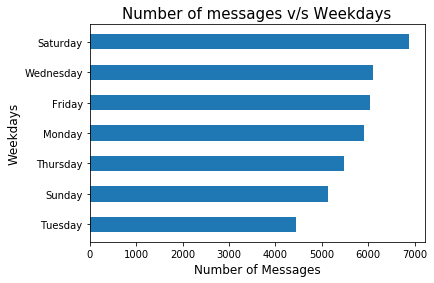

In [22]:
plt.title('Number of messages v/s Weekdays', fontdict={'size':15})
label = df.groupby('day_of_week').message.count().sort_values().index
plt.barh(y=label, width=df.groupby('day_of_week').message.count().sort_values(), height=0.5)
plt.ylabel('Weekdays', fontdict={'size':12})
plt.xlabel('Number of Messages', fontdict={'size':12})
plt.show()

In [23]:
media_df.groupby('day_of_week').message.count()

day_of_week
Friday       685
Monday       657
Saturday     723
Sunday       512
Thursday     676
Tuesday      583
Wednesday    741
Name: message, dtype: int64

In [24]:
text_df.groupby('day_of_week').message.count()

day_of_week
Friday       5362
Monday       5261
Saturday     6146
Sunday       4631
Thursday     4801
Tuesday      3853
Wednesday    5368
Name: message, dtype: int64

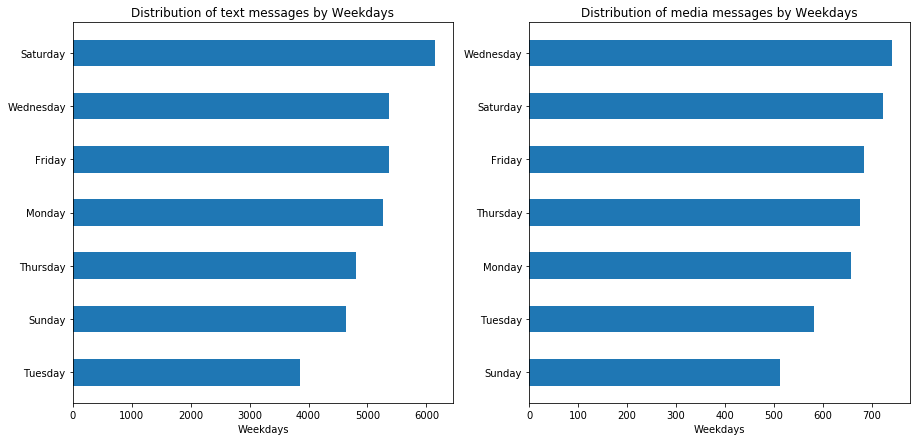

In [25]:
label_text  = text_df.groupby('day_of_week').message.count().sort_values().index
label_media = media_df.groupby('day_of_week').message.count().sort_values().index

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Distribution of text messages by Weekdays')
plt.barh(y=label_text, width=text_df.groupby('day_of_week').message.count().sort_values(), height=0.5)
plt.xlabel('Number of Messages')
plt.xlabel('Weekdays')

plt.subplot(1,2,2)
plt.title('Distribution of media messages by Weekdays')
plt.barh(y=label_media, width=media_df.groupby('day_of_week').message.count().sort_values(), height=0.5)
plt.xlabel('Number of Messages')
plt.xlabel('Weekdays')

plt.show()

In [26]:
df.groupby('day_of_week').type.value_counts()

day_of_week  type 
Friday       text     5362
             media     685
Monday       text     5261
             media     657
Saturday     text     6146
             media     723
Sunday       text     4631
             media     512
Thursday     text     4801
             media     676
Tuesday      text     3853
             media     583
Wednesday    text     5368
             media     741
Name: type, dtype: int64

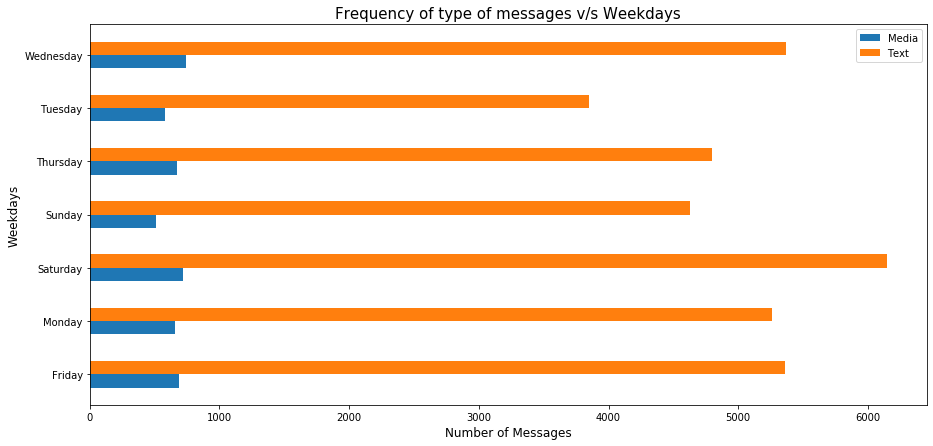

In [27]:
label = df.groupby('day_of_week').type.value_counts().index.levels[0]
height = 0.25
y_dp = [2-height, 4-height, 6-height, 8-height, 10-height, 12-height, 14-height]
y_sb = [2+height, 4+height, 6+height, 8+height, 10+height, 12+height, 14+height]

plt.figure(figsize=(15,7))
plt.title('Frequency of type of messages v/s Weekdays', fontdict={'size':15})

plt.barh(y=y_dp, width=df.query('type=="media"').groupby('day_of_week').message.count(), height=0.5, label='Media')
plt.barh(y=y_sb, width=df.query('type=="text"').groupby('day_of_week').message.count(), height=0.5, label='Text')

plt.yticks(ticks=list(range(2,15,2)), labels=label)
plt.legend()
plt.ylabel('Weekdays', fontdict={'size':12})
plt.xlabel('Number of Messages', fontdict={'size':12})
plt.show()

In [28]:
df.groupby('day_of_week').sender.value_counts()

day_of_week  sender       
Friday       Subham Bagchi    3101
             Debmalya         2946
Monday       Subham Bagchi    3065
             Debmalya         2853
Saturday     Subham Bagchi    3567
             Debmalya         3302
Sunday       Subham Bagchi    2696
             Debmalya         2447
Thursday     Subham Bagchi    2858
             Debmalya         2619
Tuesday      Subham Bagchi    2274
             Debmalya         2162
Wednesday    Subham Bagchi    3181
             Debmalya         2928
Name: sender, dtype: int64

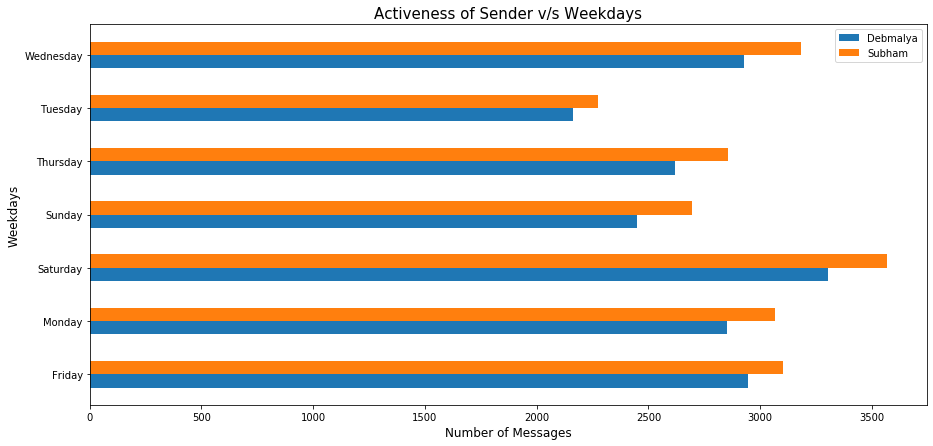

In [29]:
label = df.groupby('day_of_week').sender.value_counts().index.levels[0]
height = 0.25
y_dp = [2-height, 4-height, 6-height, 8-height, 10-height, 12-height, 14-height]
y_sb = [2+height, 4+height, 6+height, 8+height, 10+height, 12+height, 14+height]

plt.figure(figsize=(15,7))
plt.title('Activeness of Sender v/s Weekdays', fontdict={'size':15})

plt.barh(y=y_dp, width=df.query('sender=="Debmalya"').groupby('day_of_week').message.count(), height=0.5, label='Debmalya')
plt.barh(y=y_sb, width=df.query('sender=="Subham Bagchi"').groupby('day_of_week').message.count(), height=0.5, label='Subham')

plt.yticks(ticks=list(range(2,15,2)), labels=label)
plt.legend()
plt.ylabel('Weekdays', fontdict={'size':12})
plt.xlabel('Number of Messages', fontdict={'size':12})
plt.show()

In [30]:
text_df.groupby('day_of_week').message_length.mean()

day_of_week
Friday       26.842596
Monday       28.421023
Saturday     23.776277
Sunday       24.129562
Thursday     27.094772
Tuesday      27.433428
Wednesday    24.071908
Name: message_length, dtype: float64

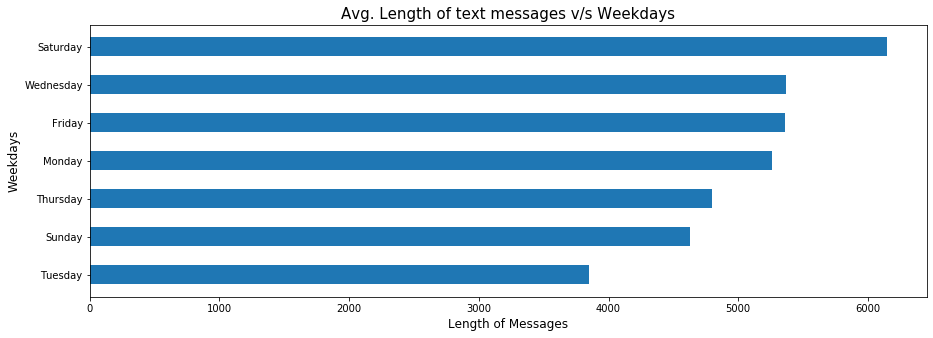

In [31]:
plt.figure(figsize=(15,5))
plt.title('Avg. Length of text messages v/s Weekdays', fontdict={'size':15})
label = text_df.groupby('day_of_week').message.count().sort_values().index
plt.barh(y=label, width=text_df.groupby('day_of_week').message.count().sort_values(), height=0.5)
plt.ylabel('Weekdays', fontdict={'size':12})
plt.xlabel('Length of Messages', fontdict={'size':12})
plt.show()

In [32]:
text_df.groupby(['day_of_week', 'sender']).message_length.mean()

day_of_week  sender       
Friday       Debmalya         30.800229
             Subham Bagchi    23.066691
Monday       Debmalya         35.681292
             Subham Bagchi    21.811910
Saturday     Debmalya         28.897793
             Subham Bagchi    19.064355
Sunday       Debmalya         33.814147
             Subham Bagchi    15.641815
Thursday     Debmalya         35.684279
             Subham Bagchi    19.136035
Tuesday      Debmalya         35.941904
             Subham Bagchi    19.501003
Wednesday    Debmalya         33.415451
             Subham Bagchi    15.698693
Name: message_length, dtype: float64

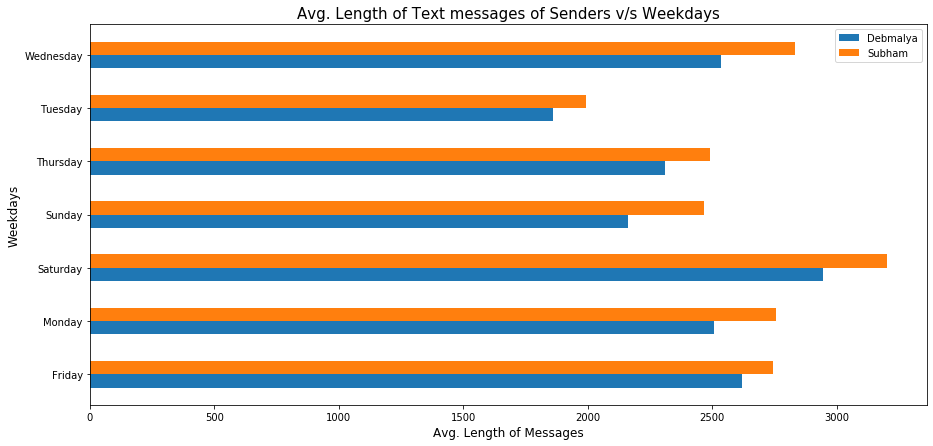

In [33]:
label = text_df.groupby(['day_of_week','sender']).sender.value_counts().index.levels[0]
height = 0.25
y_dp = [2-height, 4-height, 6-height, 8-height, 10-height, 12-height, 14-height]
y_sb = [2+height, 4+height, 6+height, 8+height, 10+height, 12+height, 14+height]

plt.figure(figsize=(15,7))
plt.title('Avg. Length of Text messages of Senders v/s Weekdays', fontdict={'size':15})

plt.barh(y=y_dp, width=text_df.query('sender=="Debmalya"').groupby(['day_of_week','sender']).sender.value_counts(), height=0.5, label='Debmalya')
plt.barh(y=y_sb, width=text_df.query('sender=="Subham Bagchi"').groupby(['day_of_week','sender']).sender.value_counts(), height=0.5, label='Subham')

plt.yticks(ticks=list(range(2,15,2)), labels=label)
plt.legend()
plt.ylabel('Weekdays', fontdict={'size':12})
plt.xlabel('Avg. Length of Messages', fontdict={'size':12})
plt.show()

In [34]:
#series_hour = df['date_time'].datetime.hour

In [35]:
sorted(df.date_time.dt.hour.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
df.groupby(df.date_time.dt.hour).message.count().sort_values()

date_time
5      256
6      259
7      340
8      598
4      893
9      917
10    1200
16    1361
18    1405
12    1628
17    1638
20    1692
11    1790
3     1857
14    1899
15    2039
19    2174
22    2201
23    2226
13    2477
2     2496
1     2522
21    3052
0     3079
Name: message, dtype: int64

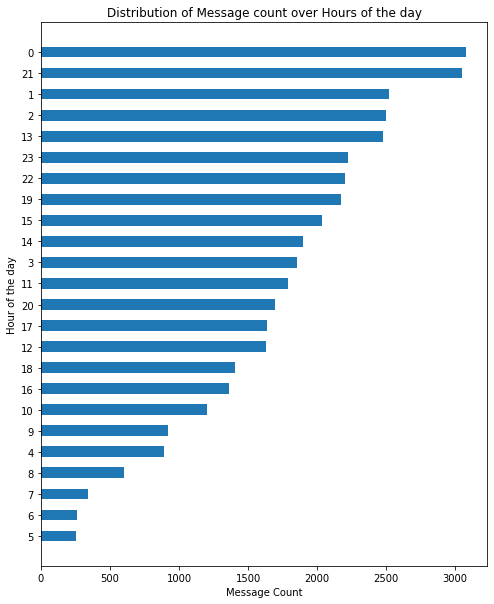

In [37]:
plt.figure(figsize=(8, 10))
plt.title('Distribution of Message count over Hours of the day')

y = list(range(0,24))
label =  df.groupby(df.date_time.dt.hour).message.count().sort_values().index
width =  df.groupby(df.date_time.dt.hour).message.count().sort_values()
plt.barh(y=y, width=width, height=0.5)
plt.yticks(ticks=y, labels=label)
plt.xlabel('Message Count')
plt.ylabel('Hour of the day')
plt.show()

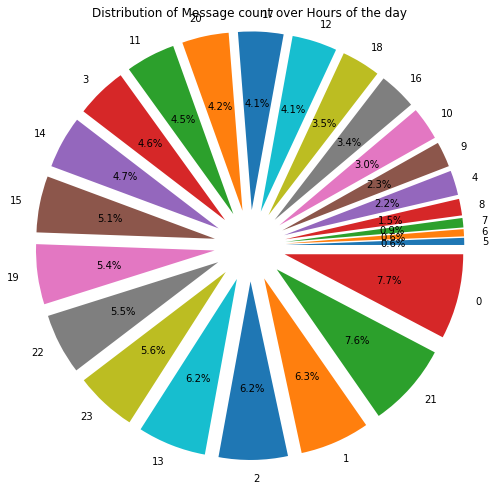

In [38]:
plt.figure(figsize=(8, 15))
plt.title('Distribution of Message count over Hours of the day')

label = df.groupby(df.date_time.dt.hour).message.count().sort_values().index
explode = [0.2 for _ in range(24)]
plt.pie(x=df.groupby(df.date_time.dt.hour).message.count().sort_values(), explode=explode, labels= label, autopct='%2.1f%%')
plt.show()

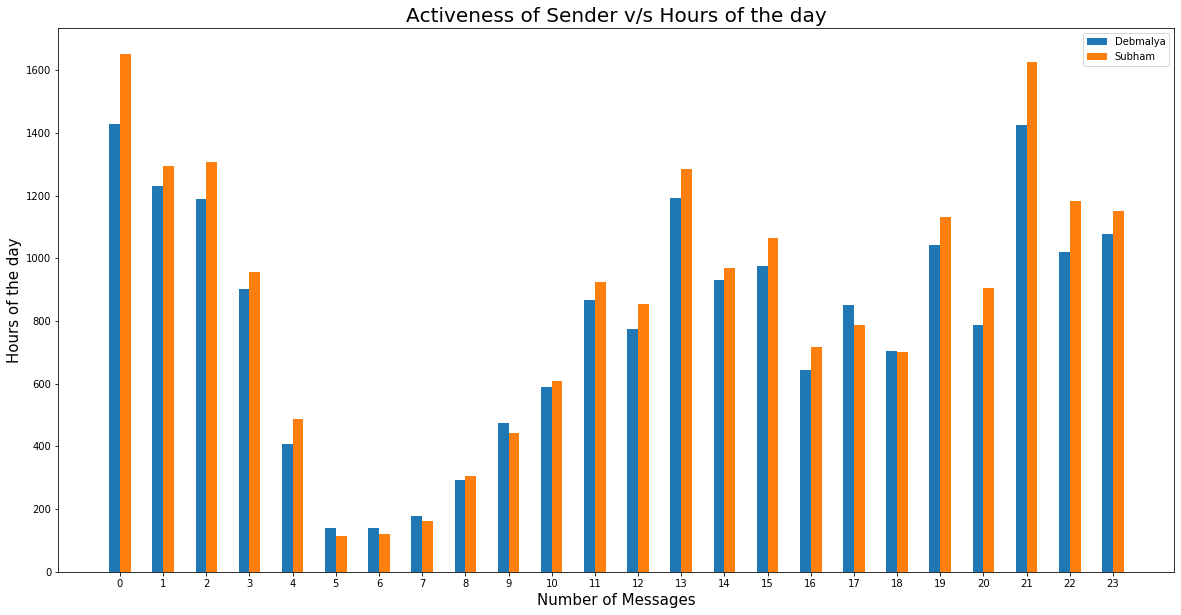

In [39]:
label = df.groupby([df.date_time.dt.hour, 'sender']).message.count().index.levels[0]

dp_df = df.query('sender=="Debmalya"')
sb_df = df.query('sender=="Subham Bagchi"')
height_dp = dp_df.groupby(dp_df.date_time.dt.hour).message.count()
height_sb = sb_df.groupby(sb_df.date_time.dt.hour).message.count()

height = 0.25
x_dp = []
x_sb = []
for i in range(1, 49, 2):
    x_dp.append(i-height)
    x_sb.append(i+height)

plt.figure(figsize=(20,10))
plt.title('Activeness of Sender v/s Hours of the day', fontdict={'size':20})

plt.bar(x=x_dp, height=height_dp, width=0.5, label='Debmalya')
plt.bar(x=x_sb, height=height_sb, width=0.5, label='Subham')

plt.xticks(ticks=list(range(1,49,2)), labels=label)
plt.legend()
plt.ylabel('Hours of the day', fontdict={'size':15})
plt.xlabel('Number of Messages', fontdict={'size':15})
plt.show()

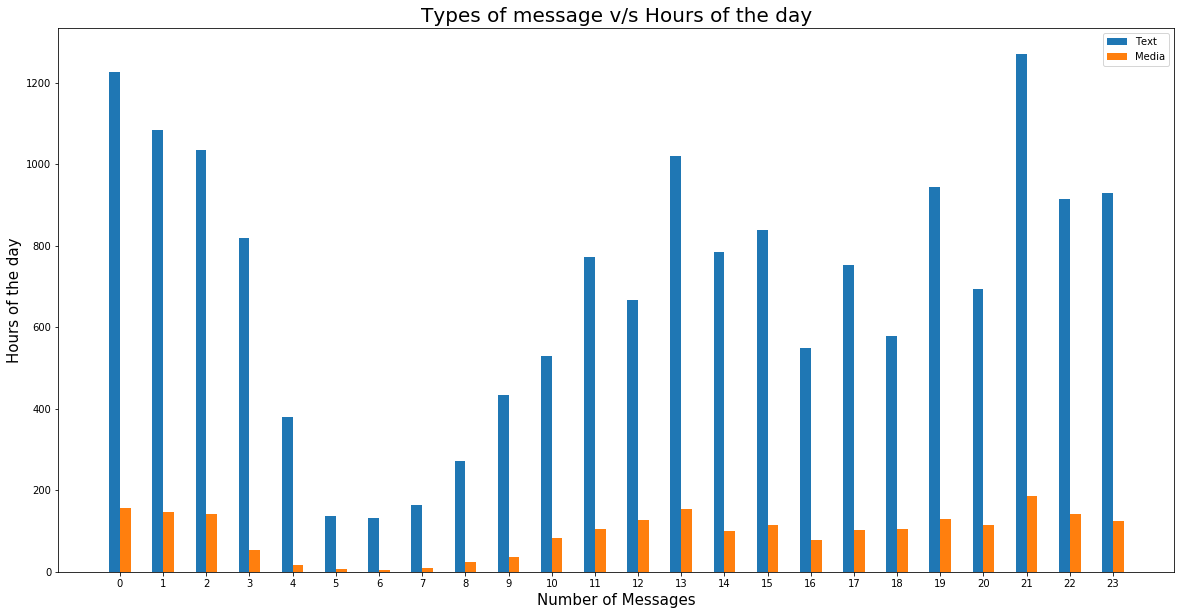

In [40]:
label = df.groupby([df.date_time.dt.hour, 'type']).message.count().index.levels[0]

height_text  = text_df.groupby(dp_df.date_time.dt.hour).message.count()
height_media = media_df.groupby(sb_df.date_time.dt.hour).message.count()

height = 0.25
x_text = []
x_media = []
for i in range(1, 49, 2):
    x_text.append(i-height)
    x_media.append(i+height)

plt.figure(figsize=(20,10))
plt.title('Types of message v/s Hours of the day', fontdict={'size':20})

plt.bar(x=x_text,  height=height_text,  width=0.5, label='Text')
plt.bar(x=x_media, height=height_media, width=0.5, label='Media')

plt.xticks(ticks=list(range(1,49,2)), labels=label)
plt.legend()
plt.ylabel('Hours of the day', fontdict={'size':15})
plt.xlabel('Number of Messages', fontdict={'size':15})
plt.show()

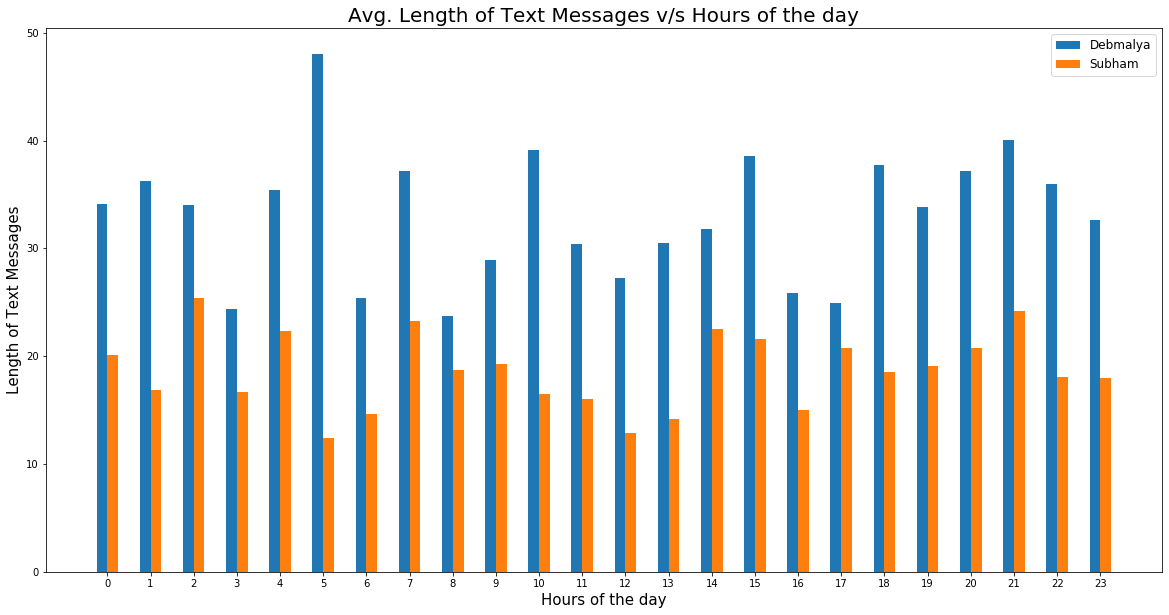

In [41]:
label = df.groupby([df.date_time.dt.hour, 'type']).message.count().index.levels[0]

height_dp  = text_df.query('sender=="Debmalya"').groupby(text_df.date_time.dt.hour).message_length.mean()
height_sb  = text_df.query('sender=="Subham Bagchi"').groupby(text_df.date_time.dt.hour).message_length.mean()

height = 0.25
x_dp = []
x_sb = []
for i in range(1, 49, 2):
    x_dp.append(i-height)
    x_sb.append(i+height)

plt.figure(figsize=(20,10))
plt.title('Avg. Length of Text Messages v/s Hours of the day', fontdict={'size':20})

plt.bar(x=x_dp, height=height_dp,  width=0.5, label='Debmalya')
plt.bar(x=x_sb, height=height_sb,  width=0.5, label='Subham')

plt.xticks(ticks=list(range(1,49,2)), labels=label)
plt.legend(fontsize='large')
plt.xlabel('Hours of the day', fontdict={'size':15})
plt.ylabel('Length of Text Messages', fontdict={'size':15})
plt.show()

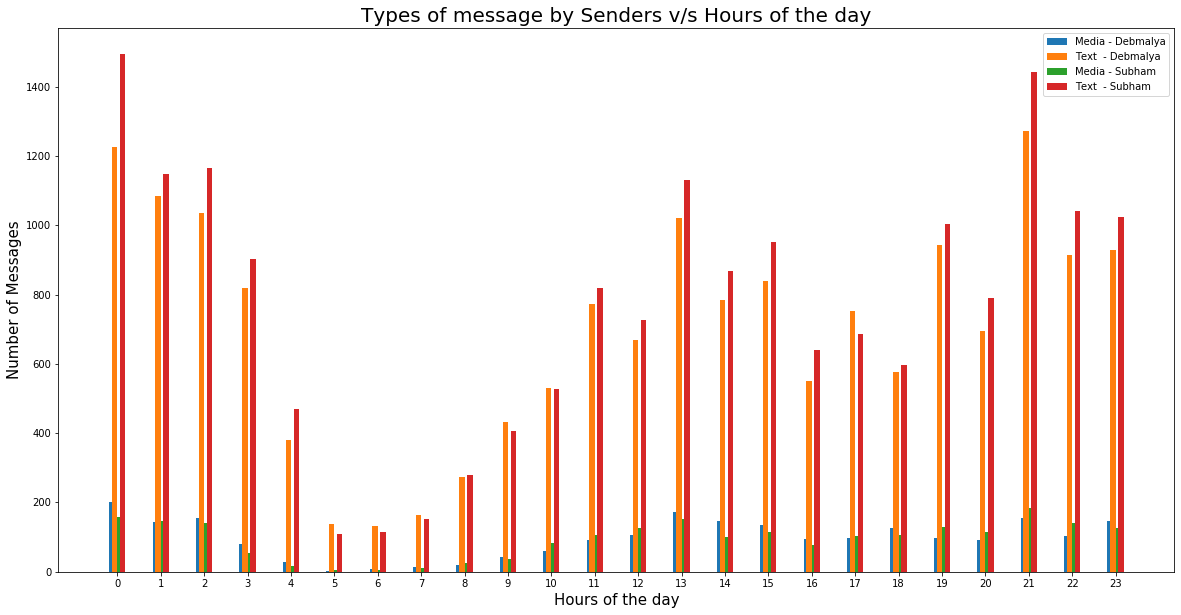

In [42]:
label = df.groupby(df.date_time.dt.hour).message.count().index

height_text_dp  = text_df.query('sender=="Debmalya"').groupby(text_df.date_time.dt.hour).message.count()
height_media_dp = media_df.query('sender=="Debmalya"').groupby(media_df.date_time.dt.hour).message.count()

height_text_sb  = text_df.query('sender=="Subham Bagchi"').groupby(text_df.date_time.dt.hour).message.count()
height_media_sb = media_df.query('sender=="Subham Bagchi"').groupby(media_df.date_time.dt.hour).message.count()

height = 0.125
x_text_dp = []
x_media_dp = []
x_text_sb = []
x_media_sb = []
for i in range(1, 49, 2):
    x_media_dp.append(i-(2*height))
    x_text_dp.append(i-height)
    x_media_sb.append(i+height)
    x_text_sb.append(i+(2*height))

plt.figure(figsize=(20,10))
plt.title('Types of message by Senders v/s Hours of the day', fontdict={'size':20})

plt.bar(x=x_media_dp,  height=height_media_dp,  width=0.25, label='Media - Debmalya')
plt.bar(x=x_text_dp,   height=height_text_dp,   width=0.25, label='Text  - Debmalya')
plt.bar(x=x_media_sb,  height=height_media_sb,  width=0.25, label='Media - Subham')
plt.bar(x=x_text_sb,   height=height_text_sb,   width=0.25, label='Text  - Subham')

plt.xticks(ticks=list(range(1,49,2)), labels=label)
plt.legend()
plt.xlabel('Hours of the day', fontdict={'size':15})
plt.ylabel('Number of Messages', fontdict={'size':15})
plt.show()

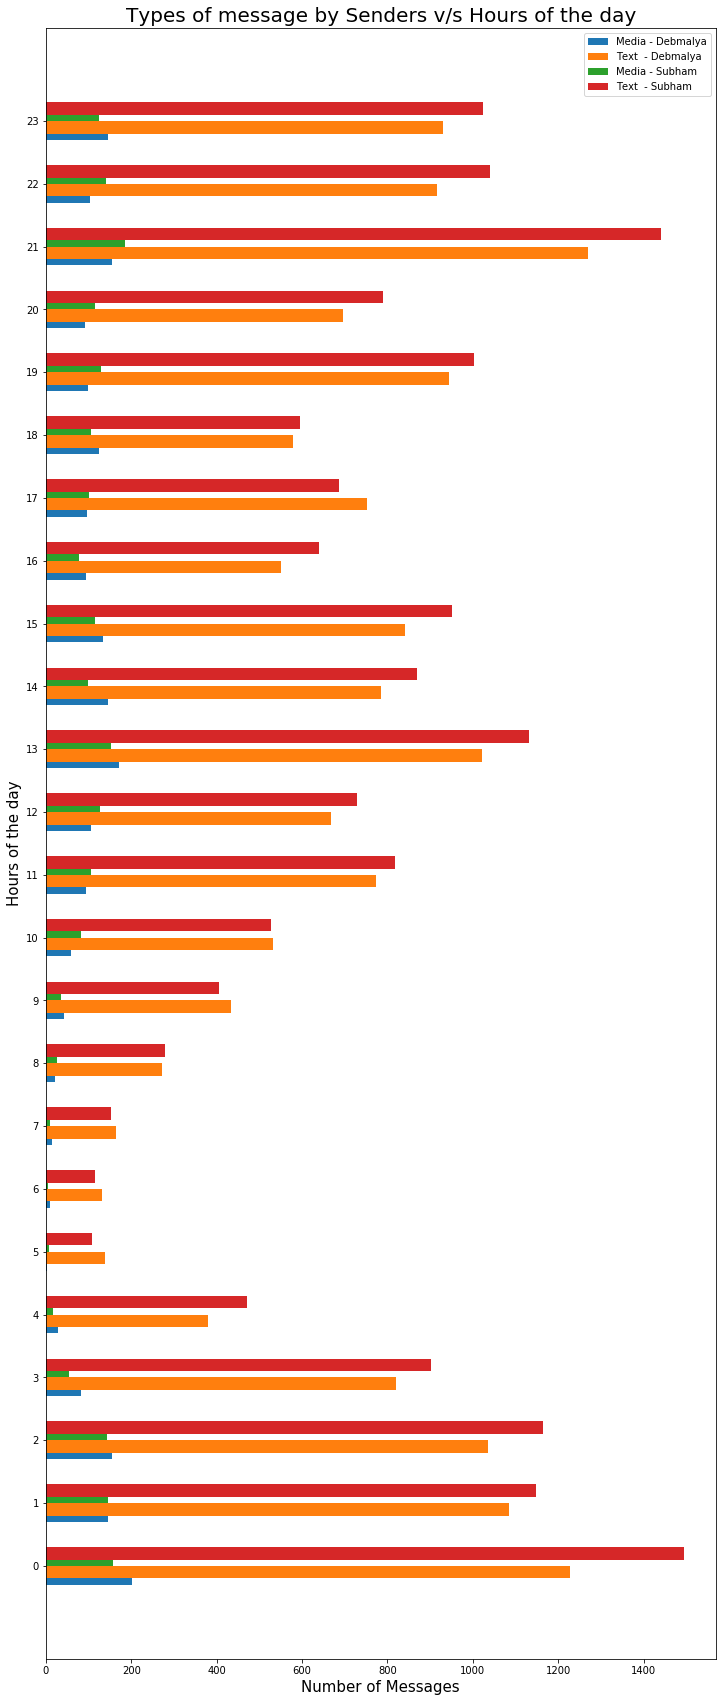

In [43]:
label = df.groupby(df.date_time.dt.hour).message.count().index

height_text_dp  = text_df.query('sender=="Debmalya"').groupby(text_df.date_time.dt.hour).message.count()
height_media_dp = media_df.query('sender=="Debmalya"').groupby(media_df.date_time.dt.hour).message.count()

height_text_sb  = text_df.query('sender=="Subham Bagchi"').groupby(text_df.date_time.dt.hour).message.count()
height_media_sb = media_df.query('sender=="Subham Bagchi"').groupby(media_df.date_time.dt.hour).message.count()

height = 0.2
x_text_dp = []
x_media_dp = []
x_text_sb = []
x_media_sb = []
for i in range(1, 49, 2):
    x_media_dp.append(i-(2*height))
    x_text_dp.append(i-height)
    x_media_sb.append(i+height)
    x_text_sb.append(i+(2*height))

plt.figure(figsize=(12,30))
plt.title('Types of message by Senders v/s Hours of the day', fontdict={'size':20})

plt.barh(y=x_media_dp,  width=height_media_dp,  height=0.4, label='Media - Debmalya')
plt.barh(y=x_text_dp,   width=height_text_dp,   height=0.4, label='Text  - Debmalya')
plt.barh(y=x_media_sb,  width=height_media_sb,  height=0.4, label='Media - Subham')
plt.barh(y=x_text_sb,   width=height_text_sb,   height=0.4, label='Text  - Subham')

plt.yticks(ticks=list(range(1,49,2)), labels=label)
plt.legend()
plt.ylabel('Hours of the day', fontdict={'size':15})
plt.xlabel('Number of Messages', fontdict={'size':15})
plt.show()